# Dwa zbiory danych będą wykorzystane: jeden do uczenia i walidacji, a drugi do testów

Text(0.5, 1.0, 'Charakterystyka L3(L2_1)')

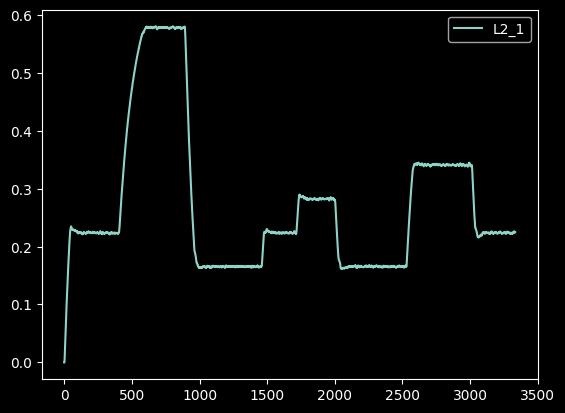

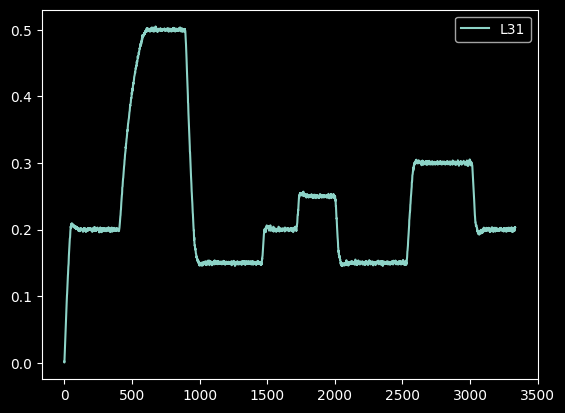

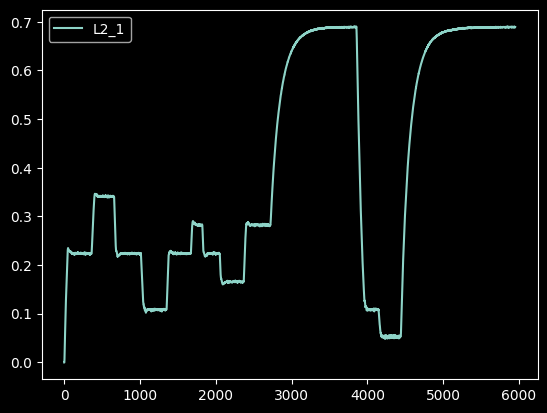

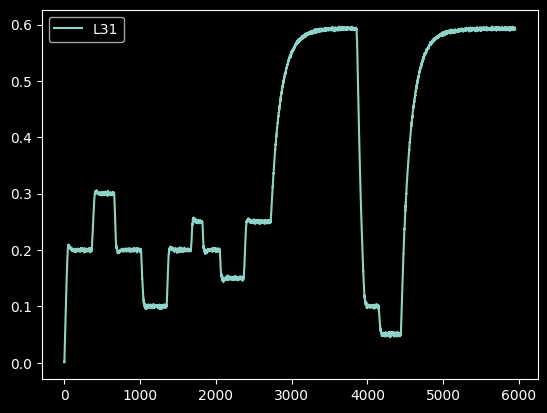

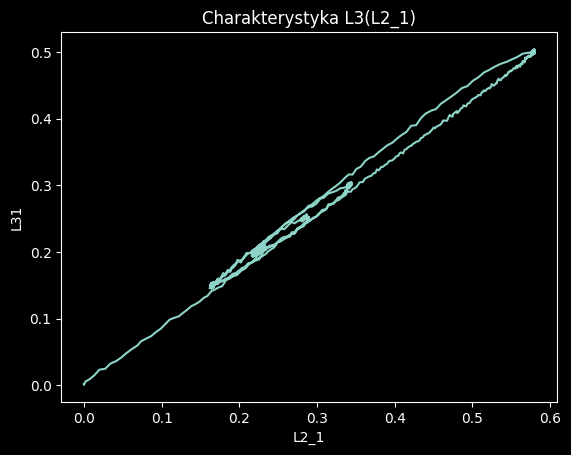

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

usecols = ["L21", "L31"]
dataset_train = pd.read_csv('Dane_AI_PID/PID_uczacy.csv', sep=',', usecols=usecols, index_col=False)
dataset_test = pd.read_csv('Dane_AI_PID/PID_testowy.csv', sep=',', usecols=usecols, index_col=False)

dataset_train['L2_1'] = dataset_train['L21'].shift(1)
dataset_train.loc[0, "L2_1"] = dataset_train['L2_1'][1]

dataset_train['L3_1'] = dataset_train['L31'].shift(1)
dataset_train.loc[0, "L3_1"] = dataset_train['L3_1'][1]

dataset_test['L2_1'] = dataset_test['L21'].shift(1)
dataset_test.loc[0, "L2_1"] = dataset_test['L2_1'][1]

dataset_test['L3_1'] = dataset_test['L31'].shift(1)
dataset_test.loc[0, "L3_1"] = dataset_test['L3_1'][1]

dataset_train.pop('L21')
dataset_test.pop('L21')

dataset_train.head()
dataset_test.head()

plt.figure()
plt.plot(dataset_test['L2_1'], label='L2_1')
plt.legend()
plt.figure()
plt.plot(dataset_test['L31'], label='L31')
plt.legend()

plt.figure()
plt.plot(dataset_train['L2_1'], label='L2_1')
plt.legend()
plt.figure()
plt.plot(dataset_train['L31'], label='L31')
plt.legend()

plt.figure()
plt.plot(dataset_test['L2_1'], dataset_test['L31'])
plt.xlabel('L2_1')
plt.ylabel('L31')
plt.title('Charakterystyka L3(L2_1)')

# Przygotowanie listy cech i wzorcowych wyjść dla danych uczących i testowych

In [2]:
train_features = dataset_train.copy()
train_labels = train_features.pop('L31')

test_features = dataset_test.copy()
test_labels = test_features.pop('L31')

# Definicja modelu i uczenie

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Narmalizacja
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

# Warstwa wejść i konstrukcja modelu
input_layer = keras.layers.Input(train_features.shape[1:])
model = keras.Sequential([
      input_layer,
      layers.Dense(2, activation='tanh'),
      layers.Dense(1)
  ])

# Kompilacja modelu
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.002))

# Proce uczenia
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    validation_split = 0.2)

# Zapis modelu
model.save('../output/L3_L2_1_L3_1.keras')

Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2411 - val_loss: 0.4253
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1445 - val_loss: 0.3788
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1252 - val_loss: 0.2819
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0586 - val_loss: 0.0026
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 9/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 10/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 11/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 12/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# Sprawdzenie

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
|=======================================-| 98%

Text(0.5, 1.0, 'Charakterystyka L3(L2_1, F3_1) w trybie MDO')

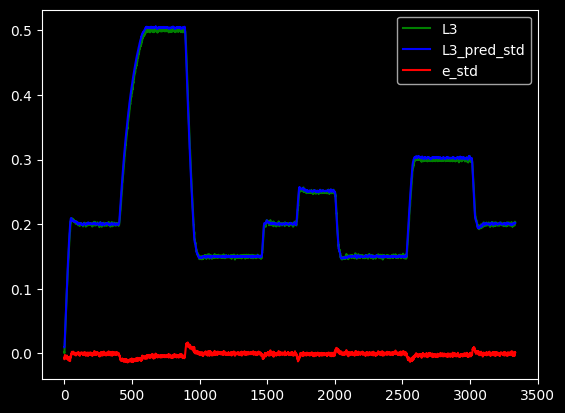

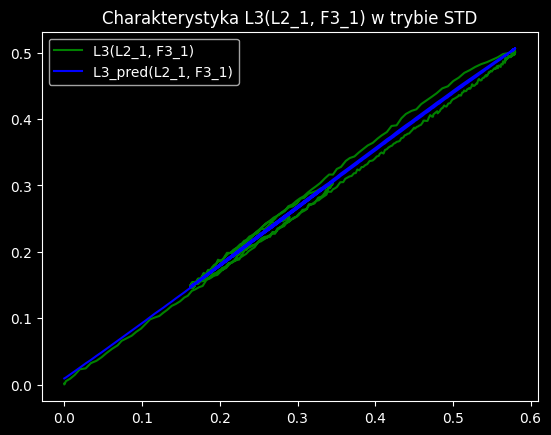

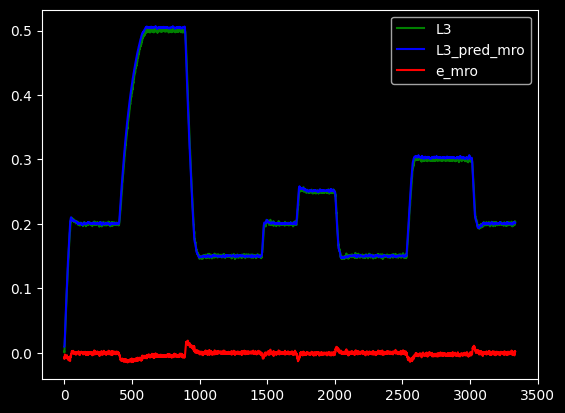

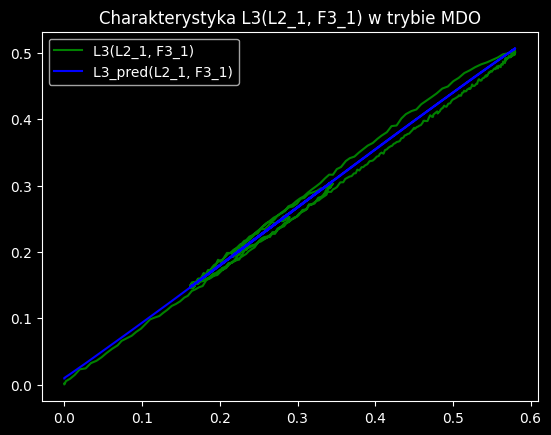

In [12]:
from tensorflow import keras

# Wczytanie modelu z pliku
model_saved = keras.models.load_model('../output/L3_L2_1_L3_1.keras')

y_ref = test_labels.array

# Predykcja w trybie STD
y_std = model_saved.predict(test_features)

e_std = [a - b for a, b in zip(y_ref, y_std)]
plt.figure()
plt.plot(y_ref, label='L3', color='g')
plt.plot(y_std, label='L3_pred_std', color='b')
plt.plot(e_std, label='e_std', color='r')
plt.legend()

plt.figure()
plt.plot(test_features['L2_1'], test_labels, label='L3(L2_1, F3_1)', color='g')
plt.plot(test_features['L2_1'], y_std, label='L3_pred(L2_1, F3_1)', color='b')
plt.legend()
plt.title('Charakterystyka L3(L2_1, F3_1) w trybie STD')

from numpy import array
from common.utils import progress_bar

# Predykcja w trybie MRO
y_mro = []
data_len = len(test_features)
for i in range(data_len):
    if i==0:
        x_mro = array([[test_features['L2_1'][0],test_features['L3_1'][0]]])
    else:
        x_mro = array([[test_features['L2_1'][i],y_mro[i-1][0]]])
    y_mro.append(model_saved.predict(x_mro, verbose = 0)[0])
    progress_bar(i, data_len, 100)

e_mro = [a - b for a, b in zip(y_ref, y_mro)]
plt.figure()
plt.plot(y_ref, label='L3', color='g')
plt.plot(y_mro, label='L3_pred_mro', color='b')
plt.plot(e_mro, label='e_mro', color='r')
plt.legend()

plt.figure()
plt.plot(test_features['L2_1'], test_labels, label='L3(L2_1, F3_1)', color='g')
plt.plot(test_features['L2_1'], y_mro, label='L3_pred(L2_1, F3_1)', color='b')
plt.legend()
plt.title('Charakterystyka L3(L2_1, F3_1) w trybie MDO')

# Wykorzystanie modelu do utworzenia czujnika programowego L3 oraz wykorzystanie go do regulacji

|======================================--| 96%

<Figure size 640x480 with 0 Axes>

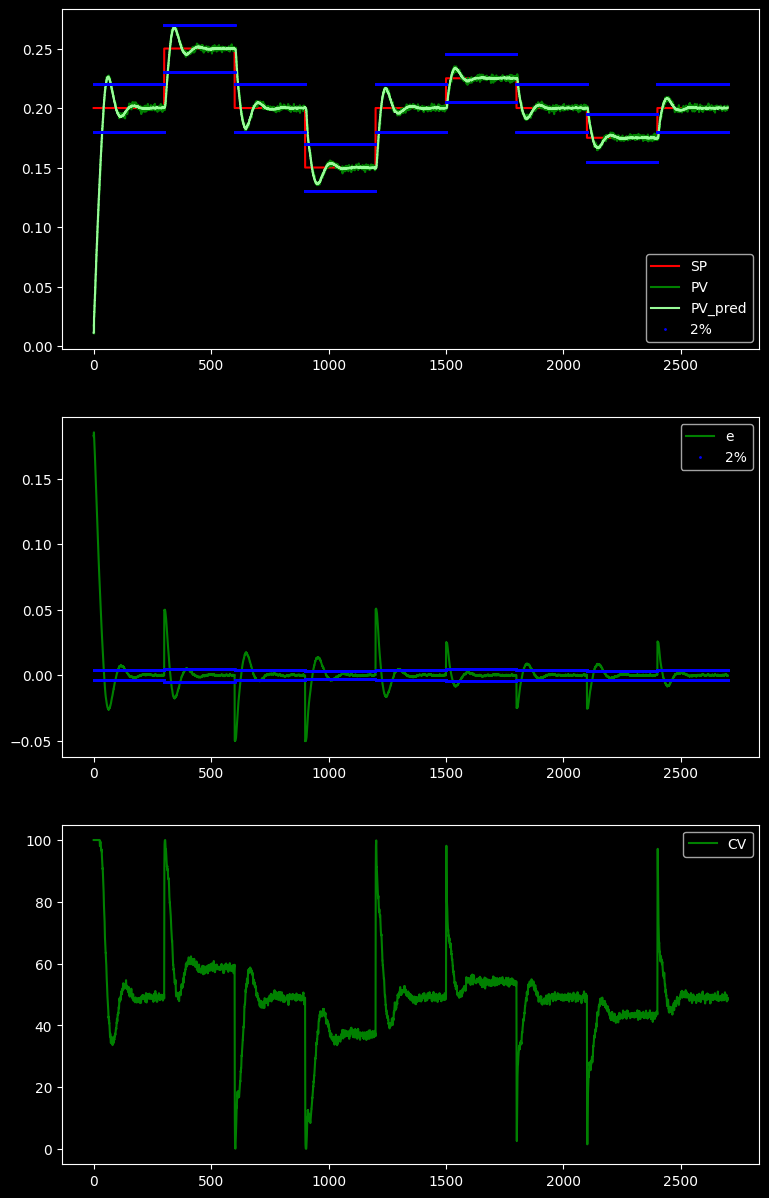

In [13]:
from params.general_params import *
from subsystems.simulator import TtsPidSim
from common.utils import set_default_params, show_evaluation, set_modes

# Utworzenie obiektu symulacji
system = TtsPidSim(tp, pr, False, 'control')

# Parametryzacja
set_default_params(system)
set_modes(system, 3)
tend = 2700
#   krok czasowy symulacji
dt = tp*pr['control']

# Wyniki dla wartości domyślnych
proc_vars = system.simulate(tend, 'control')
show_evaluation(proc_vars['t'], proc_vars['SP'], proc_vars['L3'], proc_vars['e'], proc_vars['CV'], None, None, None, proc_vars['L3_pred'])